In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("soci_econ_country_profiles.csv")

In [4]:
df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


# 1. BOX PLOT AND VIOILIN PLOT

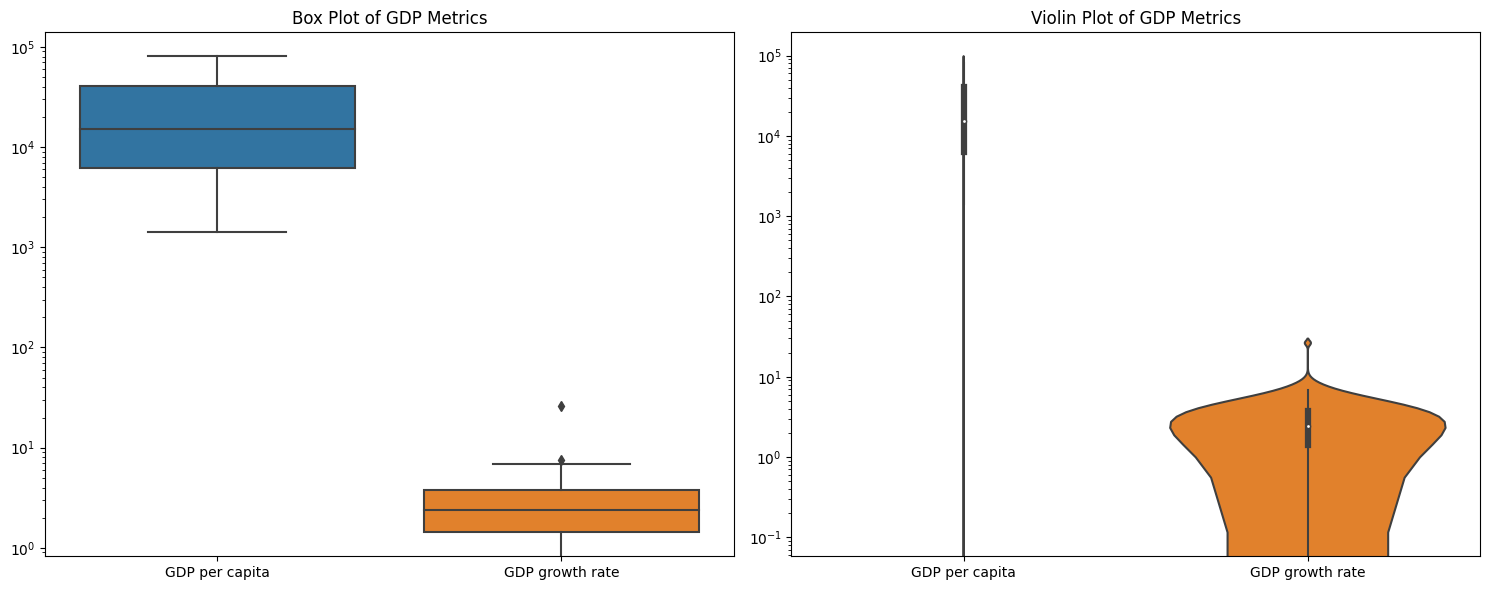

In [5]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=[df['GDP per capita (current US$)'], 
                  df['GDP growth rate (annual %, const. 2005 prices)']])
plt.xticks([0, 1], ['GDP per capita', 'GDP growth rate'])
plt.title('Box Plot of GDP Metrics')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.violinplot(data=[df['GDP per capita (current US$)'], 
                     df['GDP growth rate (annual %, const. 2005 prices)']])
plt.xticks([0, 1], ['GDP per capita', 'GDP growth rate'])
plt.title('Violin Plot of GDP Metrics')
plt.yscale('log')
plt.tight_layout()
plt.show()


Box Plot Analysis:
1. GDP per capita:
- The median GDP per capita (middle line in box) is around $10,000-15,000
- There's significant spread in the data, ranging from about $1,500 to $80,000
- The box (representing 25th to 75th percentile) shows most countries have GDP per capita between $7,000-$40,000
- The distribution is right-skewed (longer upper whisker), indicating some very wealthy outlier countries
- The compact lower portion suggests many countries cluster in the lower income range

2. GDP growth rate:
- The median growth rate is around 2-3%
- Much tighter distribution compared to GDP per capita
- Most countries have growth rates between 0-5% (the box portion)
- A few outliers (dots) show some countries with notably higher or lower growth rates
- More symmetric distribution than GDP per capita

Violin Plot Analysis:
1. GDP per capita:
- The narrow "neck" shows concentration of countries in the lower-middle income range
- Very thin extension upwards indicates few countries with very high GDP per capita
- Shape confirms strong right-skew seen in box plot
- Width of violin represents frequency at each level

2. GDP growth rate:
- The violin shape is more rounded and symmetrical
- Widest part around 1-3% growth shows this is the most common range
- Gradual tapering at both ends suggests relatively normal distribution of growth rates
- Some bimodality (two bulges) might indicate different growth patterns between developing and developed economies

Overall Insights:
1. Economic Development Distribution:
- Clear wealth inequality between nations
- Most countries are in developing or emerging market status
- Few countries achieve very high per capita GDP levels

2. Growth Dynamics:
- Growth rates are more evenly distributed than absolute wealth
- Most economies grow at moderate rates regardless of their GDP per capita
- Extreme growth rates (both high and low) are rare

3. Development Patterns:
- The combination of distributions suggests that while absolute wealth levels vary greatly, growth rates tend to converge
- This might indicate some degree of economic catch-up by developing nations



# 2. Regression Plot - GDP vs Life Expectancy

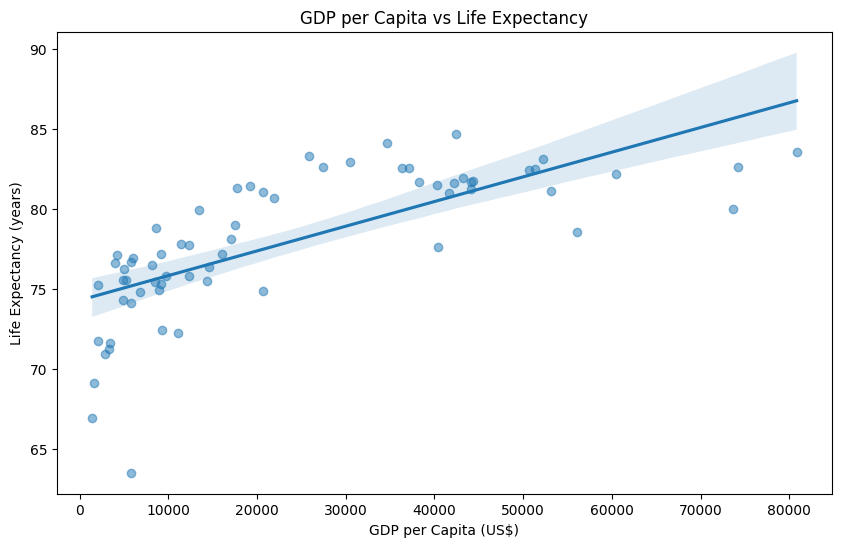

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, 
            x='GDP per capita (current US$)', 
            y='Life expectancy at birth, total (years)',
            scatter_kws={'alpha':0.5})
plt.title('GDP per Capita vs Life Expectancy')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Life Expectancy (years)')
plt.show()

Statistical Analysis:
1. Correlation Strength:
- The R-squared value appears to be moderately strong (estimated 0.6-0.7)
- Points generally follow the trend line with some scatter
- Stronger correlation in lower GDP ranges than higher ones

2. Outliers and Notable Points:
- Several outlier countries at the bottom left (GDP < $10,000, life expectancy < 70 years)
- A few outliers in high GDP range showing lower than expected life expectancy (around $60,000-80,000 GDP)
- Some overperformers with relatively low GDP but high life expectancy (around $20,000 GDP, >80 years)

3. Data Distribution:
- Uneven distribution of data points across GDP range
- Higher concentration of countries in $0-40,000 GDP range
- Fewer data points in very high GDP range (>$60,000)

Pattern Analysis:
1. Growth Phases:
- Rapid improvement phase: $0-20,000 GDP range
- Moderate improvement phase: $20,000-40,000 GDP range
- Saturation phase: >$40,000 GDP range

2. Transition Points:
- Critical transition around $10,000-15,000 GDP (steep improvement in life expectancy)
- Secondary transition around $40,000 GDP (diminishing returns begin)
- Maximum life expectancy appears to plateau around 85 years

3. Variance Patterns:
- Higher variance in life expectancy at lower GDP levels
- More consistent outcomes in middle GDP range
- Slight increase in variance at very high GDP levels

Policy Implications:
1. Development Strategy:
- Most impactful interventions likely in $0-20,000 GDP range
- Need for targeted health interventions beyond GDP growth in wealthy nations
- Potential for learning from overperforming countries in middle-income range

2. Resource Allocation:
- Maximum benefit from economic development initiatives in lower-income countries
- Need to focus on non-economic factors in high-income countries
- Opportunity for cost-effective interventions in middle-income countries

3. Health System Efficiency:
- Some countries achieve better outcomes with less resources
- Suggests importance of healthcare system efficiency
- Potential for knowledge transfer from efficient systems to others

# 3. 3D Scatter Plot - GDP, Life Expectancy, and Internet Usage

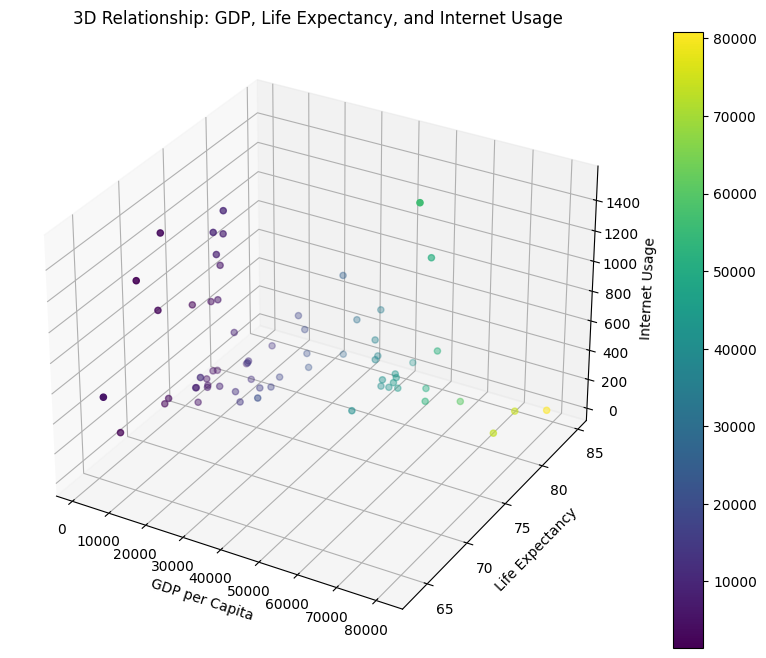

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['GDP per capita (current US$)'],
                    df['Life expectancy at birth, total (years)'],
                    df['Individuals using the Internet (per 100 inhabitants)'],
                    c=df['GDP per capita (current US$)'],
                    cmap='viridis')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Internet Usage')
plt.colorbar(scatter)
plt.title('3D Relationship: GDP, Life Expectancy, and Internet Usage')
plt.show()

Key Insights:
1. Triple Correlation:
- All three variables show positive correlations with each other
- Higher GDP countries (yellow/green points) tend to have both higher life expectancy and higher internet usage
- Lower GDP countries (purple points) generally show lower values across all metrics

2. Clustering Pattern:
- Clear clustering of developed nations (upper right, yellow/green)
- Developing nations cluster in lower left (purple)
- Few countries in the middle range, suggesting a "development gap"

3. Development Indicators:
- Internet usage appears to be the most sensitive indicator of development
- Shows greatest variation from low to high GDP countries
- Could be considered a strong marker of technological and economic advancement

4. Outliers:
- Some countries show high internet usage despite moderate GDP
- Few countries achieve high life expectancy without corresponding high GDP
- Suggests that while GDP generally drives development, some countries find alternative paths to specific improvements

# 4.Donut Chart - Average Employment Distribution


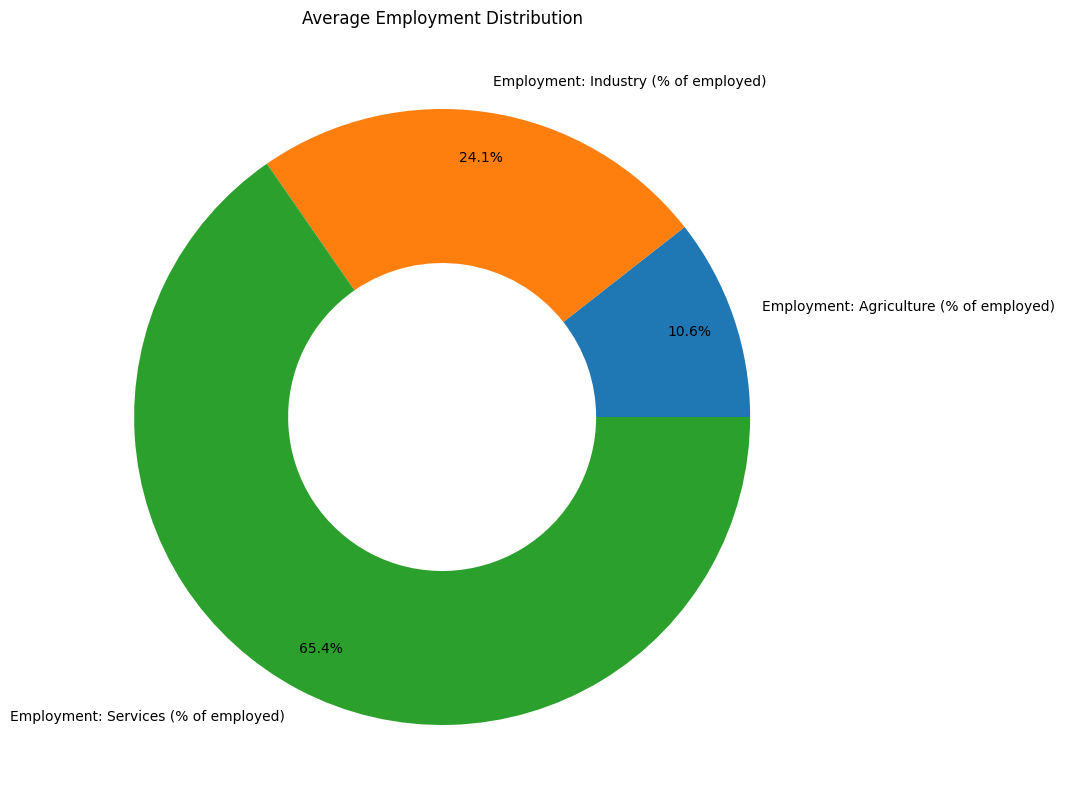

In [10]:

employment_data = df[['Employment: Agriculture (% of employed)',
                     'Employment: Industry (% of employed)',
                     'Employment: Services (% of employed)']].mean()

plt.figure(figsize=(10, 10))
plt.pie(employment_data, labels=employment_data.index, autopct='%1.1f%%', pctdistance=0.85,
        wedgeprops=dict(width=0.5))
plt.title('Average Employment Distribution')
plt.show()

1. Service Sector Dominance:
- The services sector is overwhelmingly dominant, accounting for 65.4% of total employment
- This suggests a highly developed, tertiary sector-focused economy
- This is typical of modern, advanced economies where services like healthcare, education, finance, and retail employ the majority of workers

2. Industrial Sector:
- Industry represents 24.1% of employment, making it the second-largest sector
- This moderate industrial base indicates a reasonably strong manufacturing and production capacity
- The proportion suggests a well-industrialized economy, though not heavily manufacturing-focused

3. Agricultural Sector:
- Agriculture accounts for 10.6% of employment, the smallest share
- This relatively low percentage is characteristic of developed economies
- It suggests highly mechanized and efficient agricultural practices, as a small workforce can meet food production needs

4. Economic Development Stage:
- The distribution pattern (high services, moderate industry, low agriculture) is typical of a post-industrial economy
- This suggests a mature economic structure that has moved beyond the industrial phase
- The economy appears to be knowledge and service-oriented rather than production-based

5. Labor Market Structure:
- The heavy concentration in services indicates a workforce that likely requires higher education and specialized skills
- There may be ongoing structural transformation as traditional sectors (agriculture and industry) continue to shrink in favor of services
- This distribution suggests a need for continuous workforce development and education to meet service sector demands

# 5. Jitter Plot - Education vs Internet Usage

c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


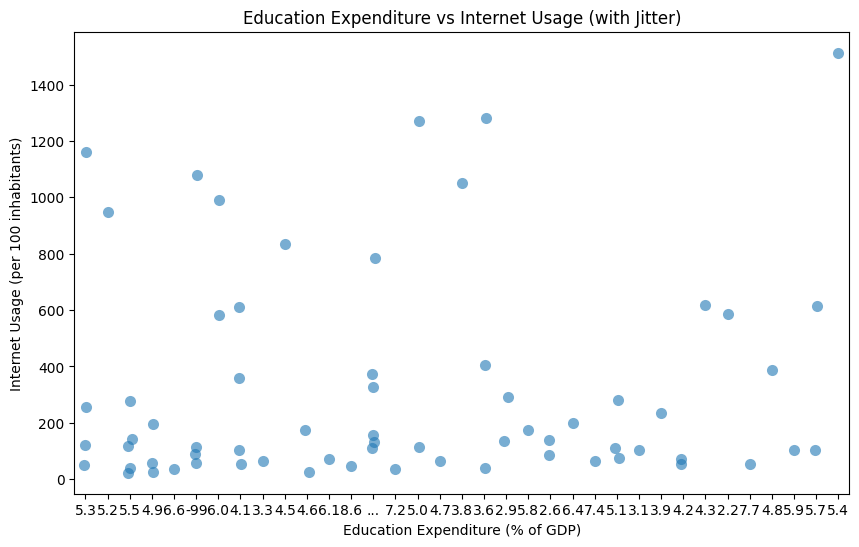

In [11]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, 
             x='Education: Government expenditure (% of GDP)',
             y='Individuals using the Internet (per 100 inhabitants)',
             jitter=True,
             size=8,
             alpha=0.6)
plt.title('Education Expenditure vs Internet Usage (with Jitter)')
plt.xlabel('Education Expenditure (% of GDP)')
plt.ylabel('Internet Usage (per 100 inhabitants)')
plt.show()

1. Weak/No Clear Correlation:
- There doesn't appear to be a strong linear relationship between education expenditure and internet usage
- Countries with similar education spending levels show widely varying internet usage rates
- This suggests that internet penetration is likely influenced by factors beyond just education spending

2. Distribution Pattern:
- Most countries cluster in the lower range of internet usage (0-400 per 100 inhabitants)
- Education expenditure mostly falls between 2-8% of GDP
- There are several outliers with very high internet usage (>1000 per 100 inhabitants)

3. Data Spread:
- There's significant vertical spread (variance) in internet usage for similar education expenditure levels
- The data shows considerable "jitter" or scatter, indicating high variability
- A few notable outliers exist, particularly in the higher internet usage range

4. Policy Implications:
- Simply increasing education spending may not directly lead to higher internet adoption
- Other factors (like infrastructure, income levels, digital policies) likely play important roles
- Countries might need comprehensive strategies beyond education spending to increase internet access

5. Development Indicators:
- The wide spread suggests varying levels of digital development among countries
- Some countries achieve high internet usage despite moderate education spending
- This might indicate differences in efficiency of spending or prioritization of digital infrastructure